# Risk Sumulation

***

### Import dataframes

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

***

### Simulate the 1000 battles with random number of dices and random results for each dice.

In [66]:
att_wins = []
def_wins = []
draws = []
att_troops_losses = []
def_troops_losses = []
rolls = 1000
results = []
roll_id = []

rng = np.random.default_rng()

for i in range(rolls):
    att_troops = rng.integers(low=2, high=5, size=1)[0]
    def_troops = rng.integers(low=1, high=4, size=1)[0]
    if att_troops > 3:
        att_dices = 3
    elif att_troops == 3:
        att_dices = 2
    else:
        att_dices = 1
    if def_troops >= 2:
        def_dices = 2
    else:
        def_dices = 1
    att_dices_results = rng.integers(low=1, high=7, size=att_dices)
    def_dices_results = rng.integers(low=1, high=7, size=def_dices)
    if att_dices >= 2 and def_dices >= 2:
        att_dices_results.sort()
        def_dices_results.sort()
        if att_dices_results[0] > def_dices_results[0] and att_dices_results[1] > def_dices_results[1]:
            def_troops_losses.append(2)
            att_troops_losses.append(0)
            draws.append(0)
            att_wins.append(1)
            def_wins.append(0)
        elif att_dices_results[0] <= def_dices_results[0] and att_dices_results[1] <= def_dices_results[1]:
            def_troops_losses.append(0)
            att_troops_losses.append(2)
            draws.append(0)
            att_wins.append(0)
            def_wins.append(1)
        elif att_dices_results[0] > def_dices_results[0] and att_dices_results[1] <= def_dices_results[1] or att_dices_results[0] <= def_dices_results[0] and att_dices_results[1] > def_dices_results[1]:
            att_troops_losses.append(1)
            def_troops_losses.append(1)
            draws.append(1)
            att_wins.append(0)
            def_wins.append(0)
    elif att_dices >= 2 and def_dices == 1:
        att_dices_results.sort()
        if att_dices_results[0] > def_dices_results[0]:
            def_troops_losses.append(1)
            att_troops_losses.append(0)
            draws.append(0)
            att_wins.append(1)
            def_wins.append(0)
        else:
            att_troops_losses.append(1)
            def_troops_losses.append(0)
            draws.append(0)
            def_wins.append(1)
            att_wins.append(0)
    elif att_dices == 1:
        def_dices_results.sort()
        if att_dices_results[0] > def_dices_results[0]:
            def_troops_losses.append(1)
            att_troops_losses.append(0)
            draws.append(0)
            att_wins.append(1)
            def_wins.append(0)
        else:
            att_troops_losses.append(1)
            def_troops_losses.append(0)
            draws.append(0)
            def_wins.append(1)
            att_wins.append(0)
    roll_id.append(i+1)  
    results.append([att_troops, def_troops, att_dices, def_dices, sorted(att_dices_results, reverse=True), sorted(def_dices_results, reverse=True), att_wins, def_wins, draws, att_troops_losses, def_troops_losses])

***

### Display results on a table

In [67]:
outcomes = pd.DataFrame({
    'roll_id': roll_id,
    'att_troops': [results[i][0] for i in range(rolls)],
    'def_troops': [results[i][1] for i in range(rolls)],
    'att_dices': [results[i][2] for i in range(rolls)],
    'def_dices': [results[i][3] for i in range(rolls)],
    'att_dices_results': [results[i][4] for i in range(rolls)],
    'def_dices_results': [results[i][5] for i in range(rolls)],
    'att_wins': att_wins,
    'def_wins': def_wins,
    'draws': draws,
    'att_troops_losses': att_troops_losses,
    'def_troops_losses': def_troops_losses
})
display(outcomes)

,roll_id,att_troops,def_troops,att_dices,def_dices,att_dices_results,def_dices_results,att_wins,def_wins,draws,att_troops_losses,def_troops_losses
0,1,4,1,3,1,"[4, 2, 2]",[5],0,1,0,1,0
1,2,2,1,1,1,[3],[3],0,1,0,1,0
2,3,2,3,1,2,[4],"[5, 5]",0,1,0,1,0
3,4,3,2,2,2,"[3, 1]","[6, 3]",0,1,0,2,0
4,5,3,1,2,1,"[5, 1]",[6],0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,2,2,2,"[6, 1]","[2, 1]",0,0,1,1,1
996,997,3,1,2,1,"[6, 1]",[3],0,1,0,1,0
997,998,3,1,2,1,"[5, 4]",[6],0,1,0,1,0
998,999,3,2,2,2,"[6, 5]","[6, 2]",0,0,1,1,1


***

### Plot the outcomes on a pie chart

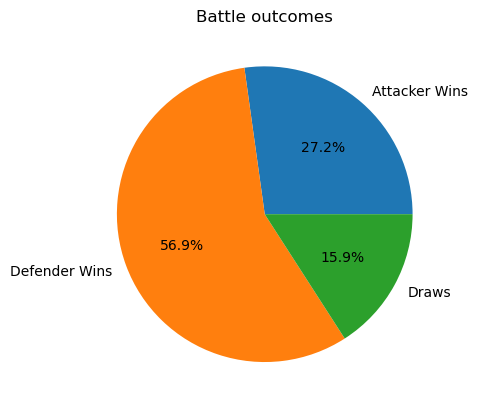

In [68]:
fig, ax = plt.subplots()
ax.pie([sum(att_wins), sum(def_wins), sum(draws)], labels=['Attacker Wins', 'Defender Wins', 'Draws'], autopct='%1.1f%%')
ax.set_title('Battle outcomes')
plt.show()

***

### Plot the results of the army losses on a bar chart

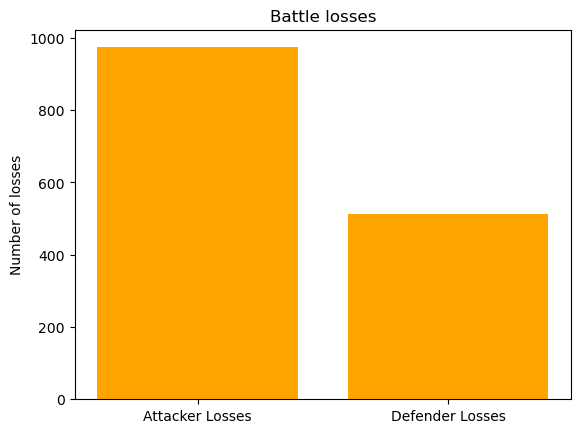

In [69]:
fig, ax = plt.subplots()
ax.bar(['Attacker Losses', 'Defender Losses'], [sum(att_troops_losses), sum(def_troops_losses)], color='orange')
ax.set_ylabel('Number of losses')
ax.set_title('Battle losses')
plt.show()

***

### The End